# Regresion Basica: Predecir eficiencia de gasolina

Este libro usa el set de datos clasico [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) y construye un modelo para predecir el consumo de vehiculos de 1970 y 1980. Para hacer esto proveeremos el modelo con una descripcion de muchos automoviles de ese periodo. Esta descripcion incluye atributos como: Cilindros, desplazamiento, potencia y peso.

El objetivo de este ejercicio es predecir el target miles per galon (MPG), que vendría a representar las millas por galón de combustible.

Este ejemplo usa el API `tf.keras` , revise [Esta Guia](https://www.tensorflow.org/guide/keras) para obtener mas detalles.

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras

## El set de Datos de MPG

El set de datos esta disponible de el siguiente repositorio [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/).

### Obtenga los datos
Primero descargue el set de datos.
keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

In [2]:
dataset_path = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'C:\\Users\\Miguel Angel\\.keras\\datasets\\auto-mpg.data'

Importelo usando pandas.

In [3]:
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']

In [101]:
# df = pd.read_fwf(dataset_path, names= column_names)
df = pd.read_csv(dataset_path, names= column_names, delim_whitespace=True) # na_values=['?']
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car Name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [23]:
df.describe()

,MPG,Cylinders,Displacement,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


### Limpia los datos

Trata los missings y variables categóricas

In [24]:
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
Car Name        0
dtype: int64

In [25]:
df['Horsepower'].sort_values()

133    100.0
98     100.0
256    100.0
107    100.0
334    100.0
       ...  
126        ?
374        ?
354        ?
32         ?
336        ?
Name: Horsepower, Length: 398, dtype: object

In [ ]:
# df = df[df['Horsepower']!='?'] Borramos registros

In [103]:
df['Horsepower_new'] = np.where(df['Horsepower']=='?', np.nan,  df['Horsepower'])

In [108]:
df['Horsepower_new'] = df['Horsepower_new'].astype(float)

In [109]:
df['Horsepower_new'].mean()

104.46938775510205

In [110]:
df['Horsepower_new'] = df['Horsepower_new'].fillna(np.mean(df['Horsepower_new']))

In [111]:
df.isna().sum()

MPG               0
Cylinders         0
Displacement      0
Horsepower        0
Weight            0
Acceleration      0
Model Year        0
Origin            0
Car Name          0
Horsepower_new    0
dtype: int64

In [37]:
df['Car Name'].str.contains("ford")

0      False
1      False
2      False
3      False
4       True
       ...  
393     True
394    False
395    False
396     True
397    False
Name: Car Name, Length: 398, dtype: bool

In [41]:
df['Origin'].value_counts()

1    249
3     79
2     70
Name: Origin, dtype: int64

In [47]:
df[df['Origin']==3]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name,Horsepower_new
14,24.0,4,113.0,95.00,2372.0,15.0,70,3,toyota corona mark ii,95.0
18,27.0,4,97.0,88.00,2130.0,14.5,70,3,datsun pl510,88.0
29,27.0,4,97.0,88.00,2130.0,14.5,71,3,datsun pl510,88.0
31,25.0,4,113.0,95.00,2228.0,14.0,71,3,toyota corona,95.0
53,31.0,4,71.0,65.00,1773.0,19.0,71,3,toyota corolla 1200,65.0
...,...,...,...,...,...,...,...,...,...,...
382,34.0,4,108.0,70.00,2245.0,16.9,82,3,toyota corolla,70.0
383,38.0,4,91.0,67.00,1965.0,15.0,82,3,honda civic,67.0
384,32.0,4,91.0,67.00,1965.0,15.7,82,3,honda civic (auto),67.0
385,38.0,4,91.0,67.00,1995.0,16.2,82,3,datsun 310 gx,67.0


In [112]:
df['USA'] = np.where(df['Origin']==1, 1, 0)
df['Europe'] = np.where(df['Origin']==2, 1, 0)
df['Japan'] = np.where(df['Origin']==3, 1, 0)
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name,Horsepower_new,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,130.0,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,165.0,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,150.0,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,150.0,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,140.0,1,0,0


### Divide los datos en train y test

Ahora divida el set de datos en un set de entrenamiento y otro de pruebas. 80% para entrenamiento

Usaremos el set de pruebas en la evaluacion final de nuestro modelo.

NOTA: El resultado tienen que ser dos datasets

In [113]:
df.drop(columns=["Horsepower", "Origin","Car Name"], inplace=True)

In [114]:
train_dataset = df.sample(frac=0.8, random_state=10)
test_dataset = df.drop(train_dataset.index)

### Inspecciona los datos

Revise rapidamente la distribucion conjunta del dataset de entrenamiento mediante un grid de gráficos

In [53]:
train_dataset.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Weight', 'Acceleration',
       'Model Year', 'Horsepower_new', 'USA', 'Europe', 'Japan'],
      dtype='object')

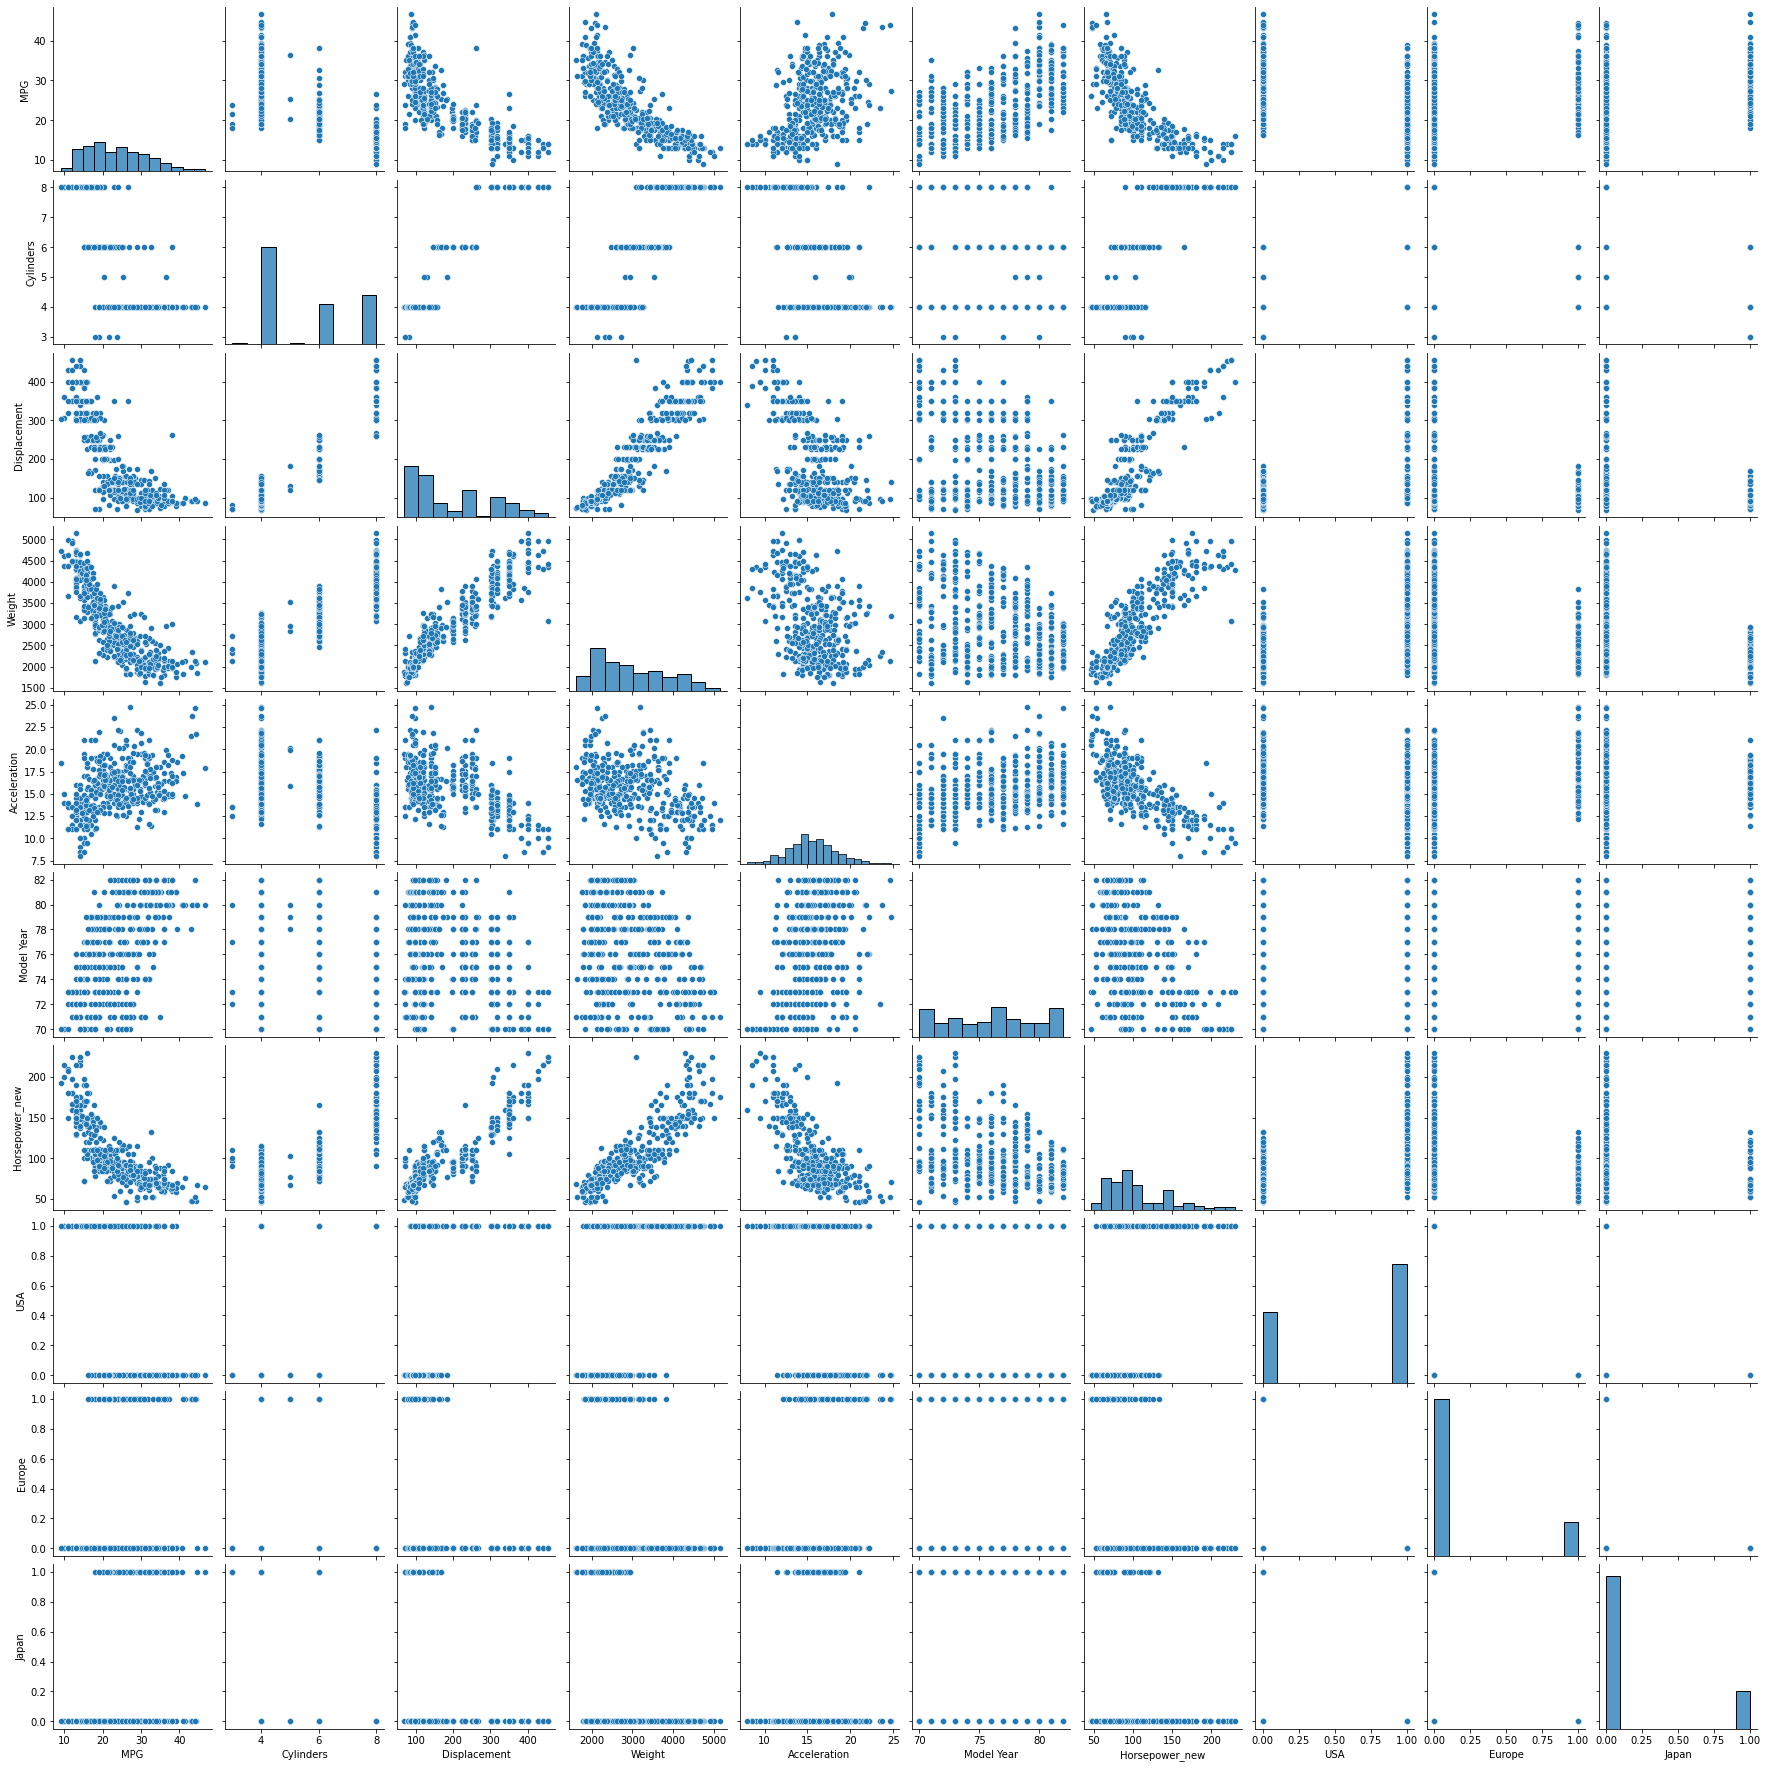

In [54]:
sns.pairplot(df)

Tambien revise las estadisticas generales:

In [56]:
df.describe()

,MPG,Cylinders,Displacement,Weight,Acceleration,Model Year,Horsepower_new,USA,Europe,Japan
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,104.469388,0.625628,0.175879,0.198492
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,38.491160,0.484569,0.381197,0.399367
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,46.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,75.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,93.500000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,126.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,230.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

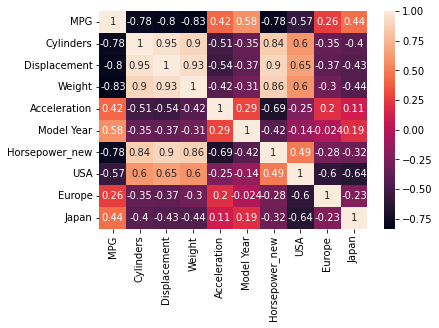

In [57]:
sns.heatmap(df.corr(), annot=True)

### Separa las features del target

Separe el target de las features.

In [115]:
X_train = train_dataset.drop(columns='MPG')
X_test = test_dataset.drop(columns='MPG')

y_train = train_dataset['MPG']
y_test = test_dataset['MPG']

In [116]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(318, 9)
(80, 9)
(318,)
(80,)


In [117]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 331 to 185
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cylinders       318 non-null    int64  
 1   Displacement    318 non-null    float64
 2   Weight          318 non-null    float64
 3   Acceleration    318 non-null    float64
 4   Model Year      318 non-null    int64  
 5   Horsepower_new  318 non-null    float64
 6   USA             318 non-null    int32  
 7   Europe          318 non-null    int32  
 8   Japan           318 non-null    int32  
dtypes: float64(4), int32(3), int64(2)
memory usage: 21.1 KB


### Estandariza los datos

Es una buena práctica estandarizar funciones que utilizan diferentes escalas y rangos. Aunque el modelo podría converger sin estandarizar, dificulta el entrenamiento y hace que el modelo resultante dependa de la elección de las unidades utilizadas en la entrada.

In [118]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Estos datos estandarizados es lo que usaremos para entrenar el modelo.

## El modelo

### Construye el modelo

Construyamos nuestro modelo. Aquí, utilizaremos un modelo `secuencial` con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo.

Por tanto, tendrá tres capas. Una de entrada con activación relu. Otra hidden layer con activación relu y la de salida de regresión, que se compondrá de una única neurona. Pon las neuronas que consideres para las dos primeras capas.

Para el compile utiliza un loss='mse'.

optimizer = `tf.keras.optimizers.RMSprop(0.001)`

Y en metrics añade en una lista el `mae` y `mse`.

In [68]:
import tensorflow as tf

In [67]:
X_train_scaled.shape[1]

9

In [76]:
X_train_scaled.shape[1:]

(9,)

In [119]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=X_train_scaled.shape[1:]),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation="relu")
])

model.compile(loss="mse", optimizer=tf.keras.optimizers.RMSprop(0.001), metrics=['mse','mae'])

### Inspeccione el modelo

Use el método `.summary` para imprimir una descripción simple del modelo

In [120]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                640       
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,753
Trainable params: 2,753
Non-trainable params: 0
_________________________________________________________________


In [80]:
9 * 64 + 64

640

In [81]:
64 * 32 + 32

2080

### Entrenar el modelo

Entrene el modelo para 1000 epochs y guarda los resultados del entrenamiento en una variable llamada `history`.
Emplea en el entrenamiento un 20% de los datos para validación, mediante el argumento `validation_split`.

NOTA: recuerda usar los datos normalizados.

In [121]:
train_dataset.describe()

,MPG,Cylinders,Displacement,Weight,Acceleration,Model Year,Horsepower_new,USA,Europe,Japan
count,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,23.467610,5.443396,192.205975,2968.682390,15.718868,75.984277,103.560839,0.632075,0.188679,0.179245
std,7.820162,1.683545,103.060650,840.157239,2.821385,3.646407,38.094924,0.483001,0.391870,0.384162
min,9.000000,3.000000,68.000000,1649.000000,8.500000,70.000000,46.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,98.750000,2211.250000,14.000000,73.000000,75.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,146.000000,2866.500000,15.500000,76.000000,92.000000,1.000000,0.000000,0.000000
75%,29.000000,7.500000,260.000000,3533.750000,17.475000,79.000000,120.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,4997.000000,24.800000,82.000000,230.000000,1.000000,1.000000,1.000000


In [122]:
history_1 = model.fit(X_train_scaled, y_train, epochs=1000, validation_split=0.2)

Epoch 1/1000
8/8 [==============================] - 1s 21ms/step - loss: 585.7322 - mse: 585.7322 - mae: 23.0240 - val_loss: 641.9230 - val_mse: 641.9230 - val_mae: 23.8794
Epoch 2/1000
8/8 [==============================] - 0s 4ms/step - loss: 556.8641 - mse: 556.8641 - mae: 22.3828 - val_loss: 608.9935 - val_mse: 608.9935 - val_mae: 23.1463
Epoch 3/1000
8/8 [==============================] - 0s 6ms/step - loss: 528.4860 - mse: 528.4860 - mae: 21.7212 - val_loss: 577.3828 - val_mse: 577.3828 - val_mae: 22.4508
Epoch 4/1000
8/8 [==============================] - 0s 6ms/step - loss: 498.9366 - mse: 498.9366 - mae: 21.0315 - val_loss: 542.2372 - val_mse: 542.2372 - val_mae: 21.6741
Epoch 5/1000
8/8 [==============================] - 0s 5ms/step - loss: 466.3786 - mse: 466.3786 - mae: 20.2616 - val_loss: 502.5019 - val_mse: 502.5019 - val_mae: 20.7823
Epoch 6/1000
8/8 [==============================] - 0s 5ms/step - loss: 429.1919 - mse: 429.1919 - mae: 19.3641 - val_loss: 456.3500 - val_

In [123]:
history_1.history

{'loss': [585.7322387695312,
  556.8641357421875,
  528.4860229492188,
  498.9366455078125,
  466.3785705566406,
  429.1919250488281,
  386.73638916015625,
  341.8847961425781,
  295.5647888183594,
  249.13052368164062,
  204.20849609375,
  162.73553466796875,
  126.13092803955078,
  95.65389251708984,
  72.1882553100586,
  55.349273681640625,
  44.00751876831055,
  36.34722137451172,
  30.440500259399414,
  26.09109878540039,
  22.62244987487793,
  19.919267654418945,
  17.891775131225586,
  16.127300262451172,
  14.645115852355957,
  13.389077186584473,
  12.078529357910156,
  11.609079360961914,
  10.565321922302246,
  10.026384353637695,
  9.496495246887207,
  9.074542045593262,
  8.777758598327637,
  8.249055862426758,
  8.237253189086914,
  7.924934387207031,
  7.727712154388428,
  7.63525915145874,
  7.7288994789123535,
  7.493923664093018,
  7.206932544708252,
  7.249486923217773,
  7.169334411621094,
  7.090444564819336,
  7.017251968383789,
  6.904397964477539,
  6.8855924606

Visualice el progreso de entrenamiento del modelo usando las estadísticas almacenadas en el objeto `history`.

In [124]:
df_hist = pd.DataFrame(history_1.history)
df_hist

,loss,mse,mae,val_loss,val_mse,val_mae
0,585.732239,585.732239,23.024017,641.922974,641.922974,23.879444
1,556.864136,556.864136,22.382792,608.993530,608.993530,23.146290
2,528.486023,528.486023,21.721184,577.382812,577.382812,22.450779
3,498.936646,498.936646,21.031458,542.237244,542.237244,21.674118
4,466.378571,466.378571,20.261606,502.501862,502.501862,20.782272
...,...,...,...,...,...,...
995,3.259708,3.259708,1.190260,13.482302,13.482302,2.528952
996,3.220962,3.220962,1.199160,13.985031,13.985031,2.539780
997,3.282147,3.282147,1.206314,13.577314,13.577314,2.536421
998,3.396459,3.396459,1.243766,13.656761,13.656761,2.505491


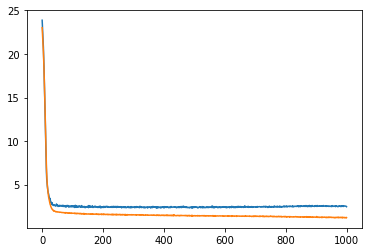

In [129]:
df_hist['val_mae'].plot();
df_hist['mae'].plot();

¿Alguna conclusión respecto a este gráfico?

Observamos que si le damos muchas epochs al entrenamiento tiende a un overfitting, siendo el error en validación cada vez más alto. Sería interesante utilizar un número aprox de 30 epochs

In [130]:
model_2 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=X_train_scaled.shape[1:]),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation="relu")
])

model_2.compile(loss="mse", optimizer=tf.keras.optimizers.RMSprop(0.001), metrics=['mse','mae'])

history_2 = model_2.fit(X_train_scaled, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
8/8 [==============================] - 1s 23ms/step - loss: 565.7006 - mse: 565.7006 - mae: 22.5697 - val_loss: 610.3882 - val_mse: 610.3882 - val_mae: 23.2002
Epoch 2/30
8/8 [==============================] - 0s 5ms/step - loss: 526.5250 - mse: 526.5250 - mae: 21.6945 - val_loss: 568.9227 - val_mse: 568.9227 - val_mae: 22.3014
Epoch 3/30
8/8 [==============================] - 0s 6ms/step - loss: 488.6962 - mse: 488.6962 - mae: 20.8128 - val_loss: 524.6483 - val_mse: 524.6483 - val_mae: 21.3015
Epoch 4/30
8/8 [==============================] - 0s 7ms/step - loss: 449.0746 - mse: 449.0746 - mae: 19.8518 - val_loss: 478.9945 - val_mse: 478.9945 - val_mae: 20.2193
Epoch 5/30
8/8 [==============================] - 0s 6ms/step - loss: 407.8340 - mse: 407.8340 - mae: 18.7930 - val_loss: 431.5206 - val_mse: 431.5206 - val_mae: 19.0231
Epoch 6/30
8/8 [==============================] - 0s 7ms/step - loss: 364.3109 - mse: 364.3109 - mae: 17.6121 - val_loss: 379.9190 - val_mse: 379.919

Añade un early stopping al modelo. Pon el argumento `callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]` dentro del fit().

Visualiza el progreso de entrenamiento.

In [131]:
model_3 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=X_train_scaled.shape[1:]),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation="relu")
])

model_3.compile(loss="mse", optimizer=tf.keras.optimizers.RMSprop(0.001), metrics=['mse','mae'])

history_3 = model_3.fit(X_train_scaled, y_train, epochs=1000, validation_split=0.2, callbacks=keras.callbacks.EarlyStopping(monitor='val_loss', patience=10))

Epoch 1/1000
8/8 [==============================] - 1s 21ms/step - loss: 567.8688 - mse: 567.8688 - mae: 22.5882 - val_loss: 613.3464 - val_mse: 613.3464 - val_mae: 23.2324
Epoch 2/1000
8/8 [==============================] - 0s 5ms/step - loss: 525.6275 - mse: 525.6275 - mae: 21.6701 - val_loss: 571.0142 - val_mse: 571.0142 - val_mae: 22.3385
Epoch 3/1000
8/8 [==============================] - 0s 7ms/step - loss: 489.0615 - mse: 489.0615 - mae: 20.8450 - val_loss: 529.4125 - val_mse: 529.4125 - val_mae: 21.4276
Epoch 4/1000
8/8 [==============================] - 0s 6ms/step - loss: 450.9786 - mse: 450.9786 - mae: 19.9502 - val_loss: 483.7996 - val_mse: 483.7996 - val_mae: 20.3904
Epoch 5/1000
8/8 [==============================] - 0s 6ms/step - loss: 409.5479 - mse: 409.5479 - mae: 18.9310 - val_loss: 435.2250 - val_mse: 435.2250 - val_mae: 19.2258
Epoch 6/1000
8/8 [==============================] - 0s 10ms/step - loss: 366.1037 - mse: 366.1037 - mae: 17.7953 - val_loss: 384.2133 - val

Interpreta el gráfico

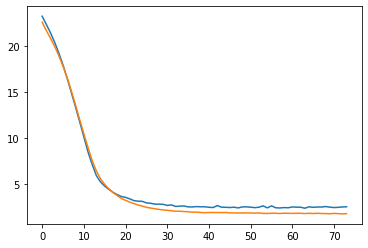

In [132]:
df_hist_3 = pd.DataFrame(history_3.history)

df_hist_3['val_mae'].plot();
df_hist_3['mae'].plot();

Observamos que el entrenamiento a pesar de tener 1000 epochs ha sido detenido debido a que el error en validación ya no conseguía una mejora y por lo tanto evitamos un posible overfitting.

Veamos qué tan bien generaliza el modelo al usar el conjunto de **test**. Esto nos dice qué tan bien podemos esperar que el modelo prediga cuándo lo usamos en el mundo real. Utiliza el método `evaluate` con los datos de test normalizados y sus labels.

Con el método evaluate devolverá tres valores: loss, mae y mse.

In [134]:
model_3.evaluate(X_test_scaled, y_test)

3/3 [==============================] - 0s 3ms/step - loss: 4.7067 - mse: 4.7067 - mae: 1.6656


[4.70665979385376, 4.70665979385376, 1.6655693054199219]

Ahora prueba el modelo. Coge 10 ejemplos de test y llama a` model.predict`.

In [137]:
preds = model_3.predict(X_test_scaled[:10])
preds

array([[18.09603 ],
       [13.599963],
       [18.64587 ],
       [15.968236],
       [20.192091],
       [20.184801],
       [23.599302],
       [22.276287],
       [21.717058],
       [13.518051]], dtype=float32)

In [139]:
model_3.save("prod_model_MAE_1_6.h5")

### Haz Predicciones

Dibuja en un scatter plot las predicciones de test vs sus true labels.

In [142]:
y_pred = model_3.predict(X_test_scaled).flatten()
y_pred

array([18.09603  , 13.599963 , 18.64587  , 15.968236 , 20.192091 ,
       20.184801 , 23.599302 , 22.276287 , 21.717058 , 13.518051 ,
       12.638892 , 30.31618  , 13.889859 , 23.199667 , 14.82175  ,
       13.107758 , 22.381632 , 13.096858 , 14.880666 , 13.1529665,
       13.72114  , 22.95703  , 25.503428 , 21.08066  , 16.569387 ,
       19.387403 , 16.48121  , 15.681937 , 16.988688 , 13.064301 ,
       25.592323 , 26.036875 , 30.180315 , 23.30102  , 14.612693 ,
       13.909224 , 23.281565 , 21.934072 , 25.937475 , 18.9498   ,
       30.702118 , 31.351664 , 31.436789 , 16.720366 , 23.730415 ,
       31.028002 , 22.945974 , 35.34608  , 33.981823 , 17.667946 ,
       19.326612 , 17.388086 , 26.285225 , 22.001862 , 20.64377  ,
       19.667143 , 19.404299 , 18.047436 , 18.284582 , 18.072504 ,
       26.495651 , 25.65256  , 28.539797 , 31.494299 , 32.246002 ,
       38.387943 , 36.379948 , 36.316998 , 32.392017 , 32.834637 ,
       21.595568 , 29.966612 , 29.683092 , 37.464054 , 32.7940

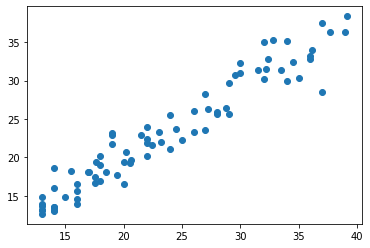

In [143]:
plt.scatter(y_test, y_pred)

Parece que nuestro modelo predice razonablemente bien. Echemos un vistazo a la distribución de errores.

Representa los residuos en un histograma

(array([ 1.,  0.,  0.,  0.,  1.,  4.,  7.,  9., 15., 12., 13.,  9.,  5.,
         1.,  3.]),
 array([-8.46020317, -7.58646495, -6.71272672, -5.83898849, -4.96525027,
        -4.09151204, -3.21777382, -2.34403559, -1.47029737, -0.59655914,
         0.27717908,  1.15091731,  2.02465553,  2.89839376,  3.77213198,
         4.64587021]),
 <BarContainer object of 15 artists>)

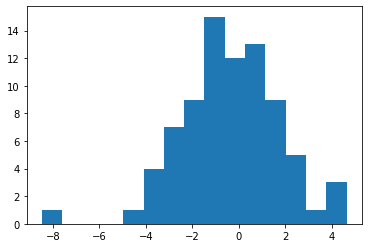

In [145]:
error = y_pred - y_test
plt.hist(error, bins=15)

No es del todo gaussiano, pero podríamos esperar eso porque el número de muestras es muy pequeño.

Guarda tu modelo en un archivo.

In [146]:
model_3.save("prod_model_MAE_1_6.h5")

## Conclusion

Este cuaderno introdujo algunas técnicas para manejar un problema de regresión.

* El error cuadrático medio (MSE) es una función de pérdida común utilizada para problemas de regresión (se utilizan diferentes funciones de pérdida para problemas de clasificación).
* Del mismo modo, las métricas de evaluación utilizadas para la regresión difieren de la clasificación. Una métrica de regresión común es el error absoluto medio (MAE).
* Cuando las características de datos de entrada numéricos tienen valores con diferentes rangos, cada característica debe escalarse independientemente al mismo rango.
* Si no hay muchos datos de entrenamiento, una técnica es preferir una red pequeña con pocas capas ocultas para evitar el sobreajuste.
* La detención temprana es una técnica útil para evitar el sobreajuste.